In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'

### [실습](Next!!!!)
* 기상 데이터 분석
* 데이터 수집 : !wget "url"
* 2010년부터 10년간 울릉도 지역의 기온과 풍속을 측정한 데이터

In [3]:
# 데이터 셋 가져오기
!curl https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/weather.csv -o  weather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 88955    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 88955  100 88955    0     0  94656      0 --:--:-- --:--:-- --:--:-- 95240


In [28]:
# 1. 데이터프레임 탐색
weather = pd.read_csv("weather.csv", index_col = 0)
weather #시계열인덱스로 만들어라 index_col

,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6
...,...,...,...
2020-07-27,22.1,4.2,1.7
2020-07-28,21.9,4.5,1.6
2020-07-29,21.6,3.2,1.0


In [6]:
weather.info() #최대풍속 잴때 4개,풍속에서는 7개 빠져서 데이터 정제 해야된다.

<class 'pandas.core.frame.DataFrame'>
Index: 3653 entries, 2010-08-01 to 2020-07-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   평균 기온   3653 non-null   float64
 1   최대 풍속   3649 non-null   float64
 2   평균 풍속   3647 non-null   float64
dtypes: float64(3)
memory usage: 114.2+ KB


In [29]:
# 2. 데이터 정제

# 1) 개별적인 열의 개수 확인 
print(weather.count())

# 2) 결측치 탐지 및 처리
missing_data = weather[weather['평균 풍속'].isna()] #없을시 true들을 가져왔다.
print(missing_data )

# #3) 결측 값을 평균 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
mean_wind = weather['평균 풍속'].mean() #그래서 평균풍속은 모두 같으니 그냥 다 채워버린다.
weather.fillna(mean_wind, inplace=True) #dropna는 사용x,이유는 3천개도 적은 데이터 이기 때문에 값을 대체해줘야된다.
weather

평균 기온    3653
최대 풍속    3649
평균 풍속    3647
dtype: int64
            평균 기온  최대 풍속  평균 풍속
일시                             
2012-02-11   -0.7    NaN    NaN
2012-02-12    0.4    NaN    NaN
2012-02-13    4.0    NaN    NaN
2015-03-22   10.1   11.6    NaN
2015-04-01    7.3   12.1    NaN
2019-04-18   15.7   11.7    NaN


In [30]:
#3) 결측 값을 평균 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
mean_wind = round(weather['평균 풍속'].mean(),2)
print(mean_wind)
weather['평균 풍속'].fillna(mean_wind, inplace=True)
weather.loc[["2012-02-11","2012-02-12","2012-02-13","2015-03-22","2015-04-01","2019-04-18"]]

3.94


,평균 기온,최대 풍속,평균 풍속
일시,,,
2012-02-11,-0.7,NaN,3.94
2012-02-12,0.4,NaN,3.94
2012-02-13,4.0,NaN,3.94
2015-03-22,10.1,11.6,3.94
2015-04-01,7.3,12.1,3.94
2019-04-18,15.7,11.7,3.94


In [31]:
#3) 결측 값을 평균 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
mean_winds = round(weather['최대 풍속'].mean(),2)
print(mean_winds)
weather['최대 풍속'].fillna(mean_winds, inplace=True)
weather.loc[["2012-02-11","2012-02-12","2012-02-13","2015-03-22","2015-04-01","2019-04-18"]]

7.91


,평균 기온,최대 풍속,평균 풍속
일시,,,
2012-02-11,-0.7,7.91,3.94
2012-02-12,0.4,7.91,3.94
2012-02-13,4.0,7.91,3.94
2015-03-22,10.1,11.60,3.94
2015-04-01,7.3,12.10,3.94
2019-04-18,15.7,11.70,3.94


In [ ]:
# 3.[데이터분석] "평균 기온" 열에서 어느 연도에  평균 기온이 가장 높았는지 연도별 평균 기온을 막대그래프로 그리기


In [32]:
# 3.1 데이터프레임 평탄화
weather.reset_index(inplace=True) #색인을 바꾼것이다 rangeindex로
weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      3653 non-null   object 
 1   평균 기온   3653 non-null   float64
 2   최대 풍속   3653 non-null   float64
 3   평균 풍속   3653 non-null   float64
dtypes: float64(3), object(1)
memory usage: 114.3+ KB


,일시,평균 기온,최대 풍속,평균 풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6


In [ ]:
#weather=
weather.info()
weather.head()
weather['year']=weather.index.year #연도 컬럼 추가.
weather.head()

In [10]:
#실제로는 이런식으로 평탄화를 하고 데이터를 사용한다.
weather.drop(columns=["index"],inplace=True) #만약 inplace로 인해 인덱스 추가시 여기서 삭제가능.
weather

,일시,평균 기온,최대 풍속,평균 풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6


In [33]:
weather

,일시,평균 기온,최대 풍속,평균 풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6
...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7
3649,2020-07-28,21.9,4.5,1.6
3650,2020-07-29,21.6,3.2,1.0
3651,2020-07-30,22.9,9.7,2.4


year
2010    15.238562
2011    12.073425
2012    11.892896
2013    12.795068
2014    12.844110
2015    13.162466
2016    13.243443
2017    13.111233
2018    13.041644
2019    13.767671
2020    12.233333
Name: 평균 기온, dtype: float64


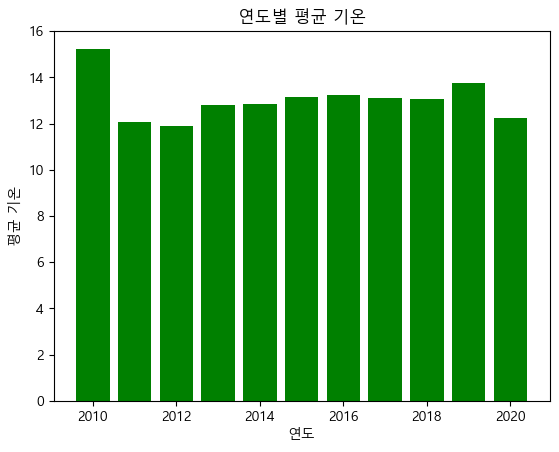

In [37]:
# 3.2 weather['일시']의 연도 값을 추출하여 weather['year']에 저장하여 데이터프레임에 추가하기

#데이트타임 속성 이용위해서 일단 이것으로 만들어 준다. 연도별로,월별로 만들때 이 작업이 중요하다.
weather['year'] = pd.DatetimeIndex(weather['일시']).year
weather.head()
# 3.3 'year' 별 평균 기온의 평균값을 집계하기

yearly_temp = weather.groupby('year')['평균 기온'].mean()
print(yearly_temp) #y축에 들어갈것들이다.
# # 3.4 막대 그래프로 그리기
years = np.arange(2010,2021)  #넘파이 어레인지로 years를 숫자로 받는다.
plt.bar(years, yearly_temp, color="green") #x축값,y축값,컬러값이다.
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()


In [ ]:
weather.head()

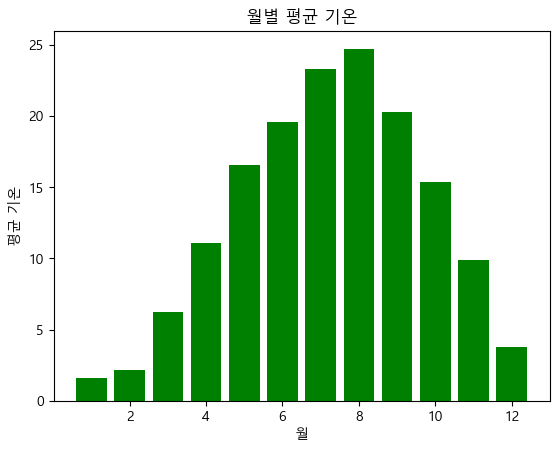

In [38]:
# [데이터분석] 4. 어느 월에  평균 기온이 가장 높았는지 월별 평균 기온을 막대그래프로 그리기
# month 속성을 사용하여 달별로 구분하여 평균 기온 값을 담기
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly_temp = weather.groupby('month')['평균 기온'].mean()

months = np.arange(1,13)
plt.bar(months, monthly_temp, color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()


Text(0, 0.5, '평균 풍속')

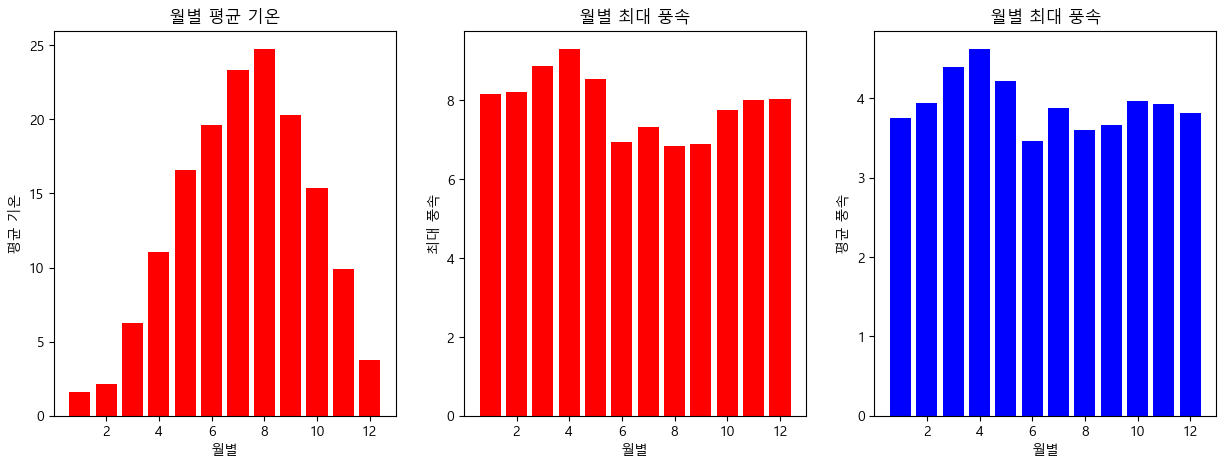

In [19]:
# [데이터 분석] 5. 기상 정보를 월별로 막대그래프로 그려서 분석하기
monthly_means = weather.groupby('month')[['평균 기온','최대 풍속', '평균 풍속']].mean()
monthly_means

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(1,13), monthly_means['평균 기온'], color = "red")
axs[0].set_title("월별 평균 기온")
axs[0].set_xlabel("월별")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(1,13), monthly_means['최대 풍속'], color = "red")
axs[1].set_title("월별 최대 풍속")
axs[1].set_xlabel("월별")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(1,13), monthly_means['평균 풍속'], color = "blue")
axs[2].set_title("월별 최대 풍속")
axs[2].set_xlabel("월별")
axs[2].set_ylabel("평균 풍속")

          평균 기온     최대 풍속     평균 풍속
year                               
2010  15.238562  8.205229  4.069281
2011  12.073425  8.355616  4.251233
2012  11.892896  7.795437  3.864536
2013  12.795068  7.859726  3.874795
2014  12.844110  7.458904  3.816438
2015  13.162466  7.694247  3.800219
2016  13.243443  7.963934  3.977869
2017  13.111233  8.001370  3.934795
2018  13.041644  8.158630  4.085479
2019  13.767671  7.797014  3.854630
2020  12.233333  7.897183  3.786385


Text(0, 0.5, '평균 풍속')

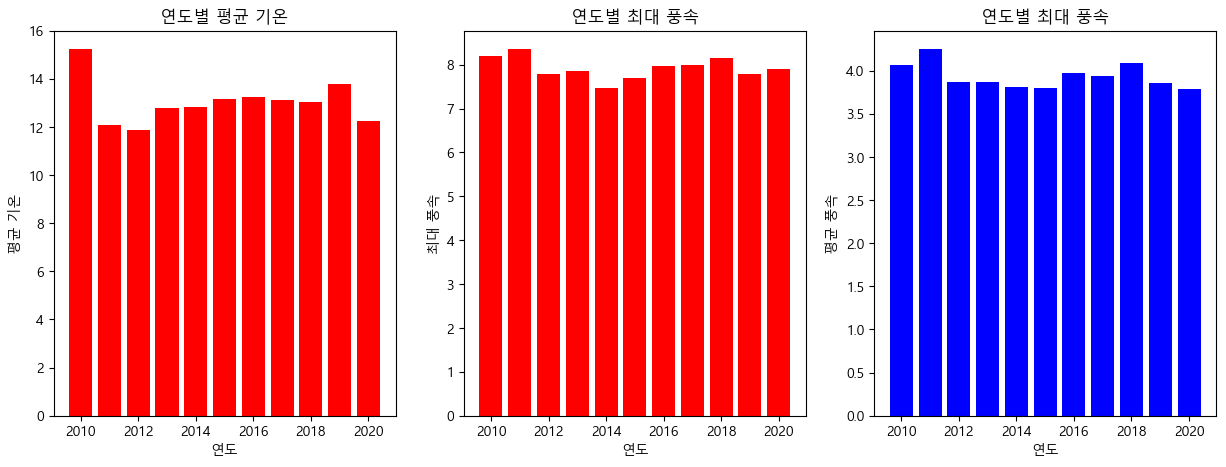

In [138]:
# [데이터분석] 6. 기상 정보를 연도별로 막대그래프로 그려서 분석하기
yearly_means = weather.groupby('year')[['평균 기온','최대 풍속', '평균 풍속']].mean()
print(yearly_means)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(2010,2021), yearly_means['평균 기온'], color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("연도")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(2010,2021),yearly_means['최대 풍속'], color = "red")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("연도")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(2010,2021),yearly_means['평균 풍속'], color = "blue")
axs[2].set_title("연도별 최대 풍속")
axs[2].set_xlabel("연도")
axs[2].set_ylabel("평균 풍속")

In [25]:
# [데이터 분석] 7. 평균 풍속이 4.0이 넘는 달만 추출하기
## 필터링 : 특정한 조건 값을 주어서 데이터프레임의 값을 필터링하기

In [24]:
# weather[weather['평균 풍속'] >= 4.0]
monthly_means.head()
monthly_means[monthly_means['평균 풍속'] >= 4.0]

,평균 기온,최대 풍속,평균 풍속
month,,,
1,1.598387,8.158065,3.757419
2,2.136396,8.225357,3.946786
3,6.250323,8.871935,4.390291
4,11.064667,9.305017,4.622483
5,16.564194,8.548710,4.219355


Text(0, 0.5, '빈도수')

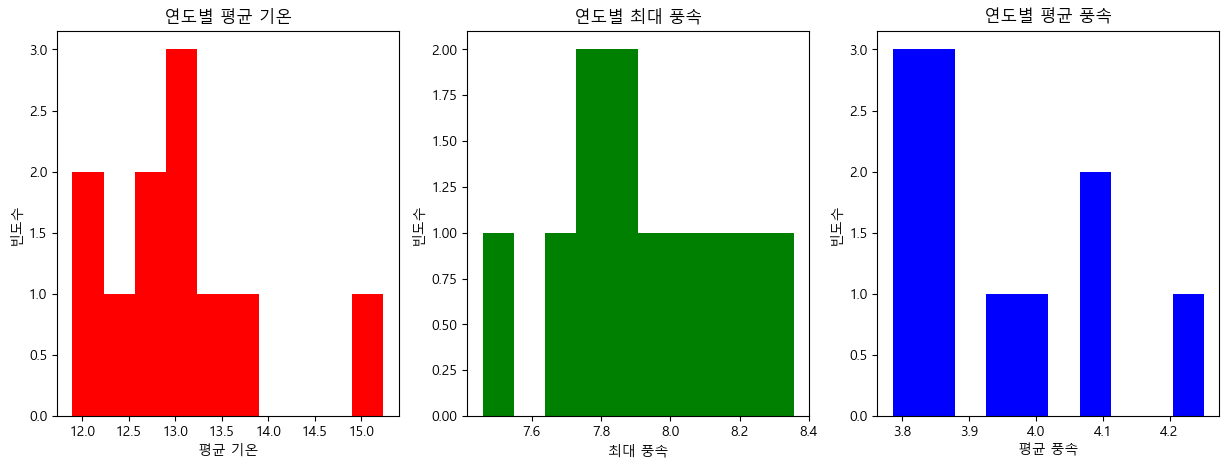

In [27]:
# [데이터 분석] 8. 연도별  '평균 기온', '최대 풍속', '평균 풍속'의 평균값을  각각 히스트그램으로 출력하시오.

# Calculate the yearly means
# yearly_means = weather.groupby('year')[['평균 기온', '최대 풍속', '평균 풍속']].mean()

# 히스토그램 그리기
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram for average temperature
axs[0].hist(yearly_means['평균 기온'], bins=10, color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("평균 기온")
axs[0].set_ylabel("빈도수")


# Plot the histogram for maximum wind speed
axs[1].hist(yearly_means['최대 풍속'], bins=10, color="green")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("최대 풍속")
axs[1].set_ylabel("빈도수")

# Plot the histogram for average wind speed
axs[2].hist(yearly_means['평균 풍속'], bins=10, color="blue")
axs[2].set_title("연도별 평균 풍속")
axs[2].set_xlabel("평균 풍속")
axs[2].set_ylabel("빈도수")


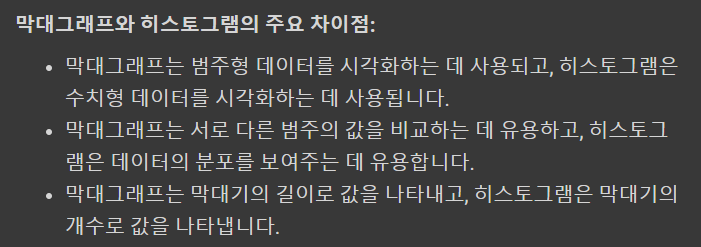

# [2차 프로그래밍 문제]
* 제출날짜: 2024-05-23까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'
weather = pd.read_csv("weather.csv", index_col = 0)

mean_wind = round(weather['평균 풍속'].mean(),2)
weather['평균 풍속'].fillna(mean_wind, inplace=True)

mean_winds = round(weather['최대 풍속'].mean(),2)
weather['최대 풍속'].fillna(mean_winds, inplace=True)

print("앞에 3개행:")
print(weather.head(3))
print()
print("뒤에 3개행:")
print(weather.tail(3))

앞에 3개행:
            평균 기온  최대 풍속  평균 풍속
일시                             
2010-08-01   28.7    8.3    3.4
2010-08-02   25.2    8.7    3.8
2010-08-03   22.1    6.3    2.9

뒤에 3개행:
            평균 기온  최대 풍속  평균 풍속
일시                             
2020-07-29   21.6    3.2    1.0
2020-07-30   22.9    9.7    2.4
2020-07-31   25.7    4.8    2.5


## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오


In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'
weather = pd.read_csv("weather.csv", index_col = 0)

mean_wind = round(weather['평균 풍속'].mean(),2)
weather['평균 풍속'].fillna(mean_wind, inplace=True)

mean_winds = round(weather['최대 풍속'].mean(),2)
weather['최대 풍속'].fillna(mean_winds, inplace=True)

print(weather.loc["2015-06-06",["평균 기온","평균 풍속"]])

평균 기온    16.6
평균 풍속     1.9
Name: 2015-06-06, dtype: float64


## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'
weather = pd.read_csv("weather.csv", index_col = 0)

mean_wind = round(weather['평균 풍속'].mean(),2)
weather['평균 풍속'].fillna(mean_wind, inplace=True)

mean_winds = round(weather['최대 풍속'].mean(),2)
weather['최대 풍속'].fillna(mean_winds, inplace=True)

result=weather.sort_values(by=["평균 기온"],ascending=False)
print("가장 더운 날짜 기상데이터:")
print(result.head(1))

가장 더운 날짜 기상데이터:
            평균 기온  최대 풍속  평균 풍속
일시                             
2013-08-08   31.3    7.8    4.6


## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'
weather = pd.read_csv("weather.csv", index_col = 0)

mean_wind = round(weather['평균 풍속'].mean(),2)
weather['평균 풍속'].fillna(mean_wind, inplace=True)

mean_winds = round(weather['최대 풍속'].mean(),2)
weather['최대 풍속'].fillna(mean_winds, inplace=True)

cos=weather["평균 기온"]>30
result=weather.loc[cos]
print("평균기온 30도를 넘는 날짜들:")
print(result)

평균기온 30도를 넘는 날짜들:
            평균 기온  최대 풍속  평균 풍속
일시                             
2013-08-08   31.3    7.8    4.6
2013-08-09   30.6    9.9    6.4
2013-08-10   30.6    7.4    3.8
2018-07-23   30.5    6.5    1.6
2018-08-04   30.3    5.8    3.0


## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

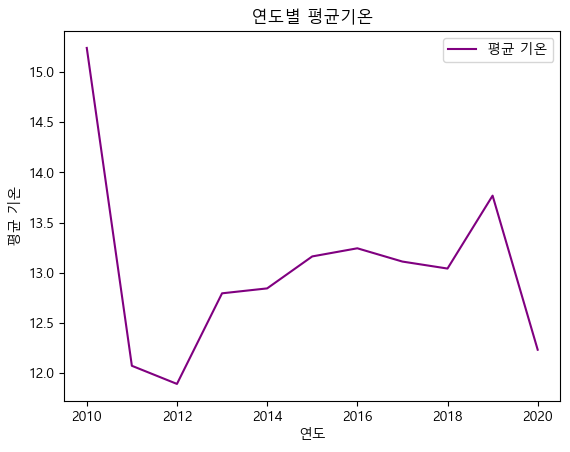

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'
weather = pd.read_csv("weather.csv", index_col = 0)

mean_wind = round(weather['평균 풍속'].mean(),2)
weather['평균 풍속'].fillna(mean_wind, inplace=True)

mean_winds = round(weather['최대 풍속'].mean(),2)
weather['최대 풍속'].fillna(mean_winds, inplace=True)

weather.reset_index(inplace=True) #색인을 바꾼것이다 rangeindex로

weather['year'] = pd.DatetimeIndex(weather['일시']).year
yearwe=weather.groupby(['year'])["평균 기온"].mean()
plt.figure()
yearwe.plot(kind="line",color="purple")
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균기온")
plt.legend()
plt.show()

## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

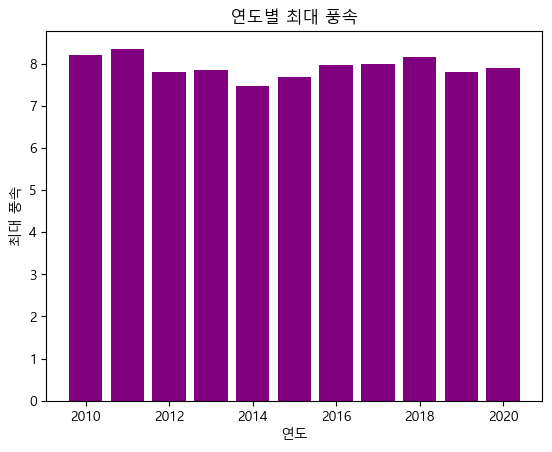

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'
weather = pd.read_csv("weather.csv", index_col = 0)

mean_wind = round(weather['평균 풍속'].mean(),2)
weather['평균 풍속'].fillna(mean_wind, inplace=True)

mean_winds = round(weather['최대 풍속'].mean(),2)
weather['최대 풍속'].fillna(mean_winds, inplace=True)

weather.reset_index(inplace=True) #색인을 바꾼것이다 rangeindex로

weather['year'] = pd.DatetimeIndex(weather['일시']).year
yearwind=weather.groupby(['year'])["최대 풍속"].mean()

years = np.arange(2010,2021)  #넘파이 어레인지로 years를 숫자로 받는다.
plt.bar(years, yearwind, color="purple") #x축값,y축값,컬러값이다.
plt.xlabel('연도')
plt.ylabel('최대 풍속')
plt.title("연도별 최대 풍속")
plt.show()

## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오


Text(0, 0.5, '빈도수')

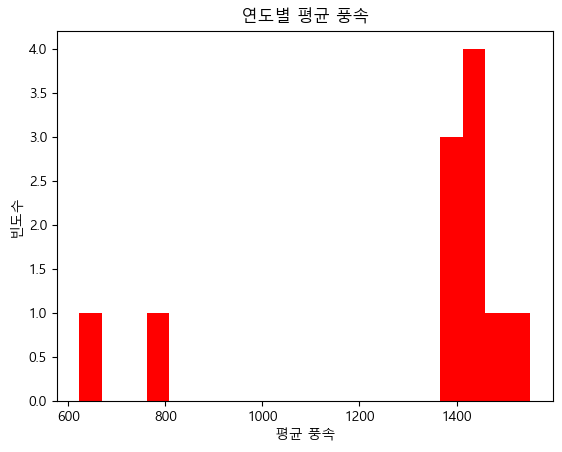

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'
weather = pd.read_csv("weather.csv", index_col = 0)

mean_wind = round(weather['평균 풍속'].mean(),2)
weather['평균 풍속'].fillna(mean_wind, inplace=True)

mean_winds = round(weather['최대 풍속'].mean(),2)
weather['최대 풍속'].fillna(mean_winds, inplace=True)

weather.reset_index(inplace=True) #색인을 바꾼것이다 rangeindex로

weather['year'] = pd.DatetimeIndex(weather['일시']).year
yearsum=weather.groupby(["year"])["평균 풍속"].sum()


plt.hist(yearsum,bins=20, color = "red")
plt.title("연도별 평균 풍속")
plt.xlabel("평균 풍속")
plt.ylabel("빈도수")

## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'
weather = pd.read_csv("weather.csv", index_col = 0)

mean_wind = round(weather['평균 풍속'].mean(),2)
weather['평균 풍속'].fillna(mean_wind, inplace=True)

mean_winds = round(weather['최대 풍속'].mean(),2)
weather['최대 풍속'].fillna(mean_winds, inplace=True)

weather.reset_index(inplace=True) #색인을 바꾼것이다 rangeindex로

weather['year'] = pd.DatetimeIndex(weather['일시']).year
yearwe=weather.groupby(['year'])["평균 기온"].mean().sort_values(ascending=False)
if(yearwe[2015]>yearwe[2016]):
    hot=yearwe[2015]
    hotyear=2015
else:
    hot=yearwe[2016]
    hotyear=2016
print(f"2015,2016년중 더 기온이 더 높았던해는{hotyear}년 이고 기온은{hot} 입니다.")  #여기 나중에 년도 나오게 수정.


2015,2016년중 더 기온이 더 높았던해는2016년 이고 기온은13.243442622950822 입니다.


## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'
weather = pd.read_csv("weather.csv", index_col = 0)

mean_wind = round(weather['평균 풍속'].mean(),2)
weather['평균 풍속'].fillna(mean_wind, inplace=True)

mean_winds = round(weather['최대 풍속'].mean(),2)
weather['최대 풍속'].fillna(mean_winds, inplace=True)

weather.reset_index(inplace=True) #색인을 바꾼것이다 rangeindex로

weather['month'] = pd.DatetimeIndex(weather['일시']).month
monthmid=weather.groupby(['month'])["평균 기온"].sum().sort_values(ascending=False)
print(f"평균기온이 가장 많은 달은{monthmid.idxmax()}월 이고 값은{monthmid[monthmid.idxmax()]} 입니다")
print(f"평균기온이 가장 적은 달은{monthmid.idxmin()}월 이고 값은{monthmid[monthmid.idxmin()]} 입니다")

평균기온이 가장 많은 달은8월 이고 값은7672.1 입니다
평균기온이 가장 적은 달은1월 이고 값은495.5 입니다


## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'
weather = pd.read_csv("weather.csv", index_col = 0)

mean_wind = round(weather['평균 풍속'].mean(),2)
weather['평균 풍속'].fillna(mean_wind, inplace=True)

mean_winds = round(weather['최대 풍속'].mean(),2)
weather['최대 풍속'].fillna(mean_winds, inplace=True)

weather.reset_index(inplace=True) #색인을 바꾼것이다 rangeindex로

weather['year'] = pd.DatetimeIndex(weather['일시']).year
yearmax=weather.groupby(['year'])["최대 풍속"].mean().sort_values(ascending=False)
print(f"최대 풍속 평균이 가장 큰 년도는{yearmax.idxmax()}년 이고 값은{yearmax[yearmax.idxmax()]} 입니다")

최대 풍속 평균이 가장 큰 년도는2011년 이고 값은8.355616438356165 입니다
